<a href="https://colab.research.google.com/github/ranaorten/SSIM-application/blob/main/SSIM-application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage.metrics import structural_similarity

In [2]:
import imutils
import cv2
from PIL import Image
import requests

In [3]:
!mkdir detection
!mkdir detection/images

In [11]:
original = Image.open("/content/detection/images/original.jpg")

tampered = Image.open("/content/detection/images/tampered.jpg")

In [13]:
print(original.format)
print(original.size)


JPEG
(757, 583)


In [14]:
print(tampered.format)
print(tampered.size)

JPEG
(757, 583)


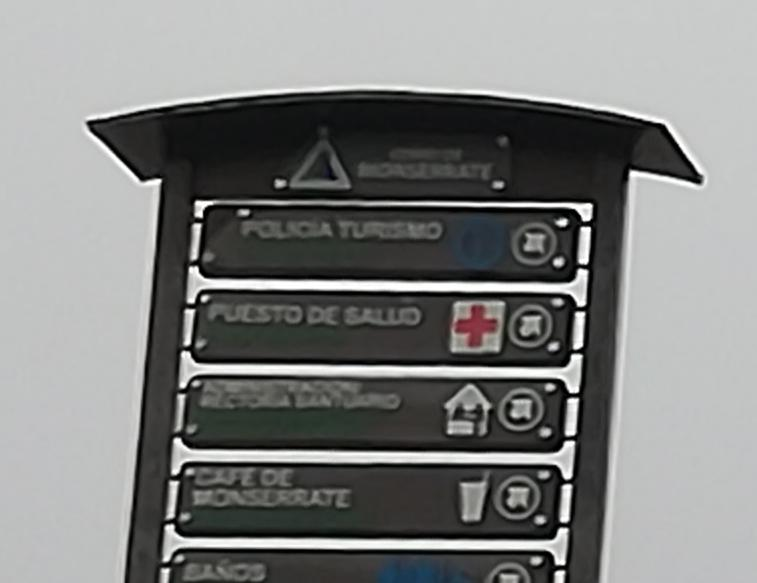

In [15]:
original

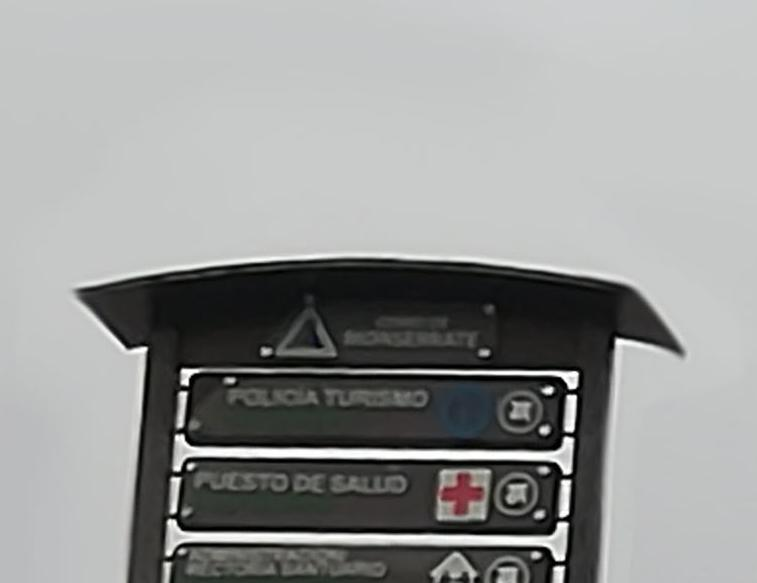

In [17]:
tampered

In [20]:
original = cv2.imread("/content/detection/images/original.jpg")
tampered = cv2.imread("/content/detection/images/tampered.jpg")

In [21]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

array([[200, 200, 200, ..., 203, 203, 203],
       [200, 200, 200, ..., 203, 203, 203],
       [200, 200, 200, ..., 203, 203, 203],
       ...,
       [188, 188, 188, ..., 191, 191, 191],
       [188, 188, 188, ..., 191, 191, 191],
       [188, 188, 188, ..., 191, 191, 191]], dtype=uint8)
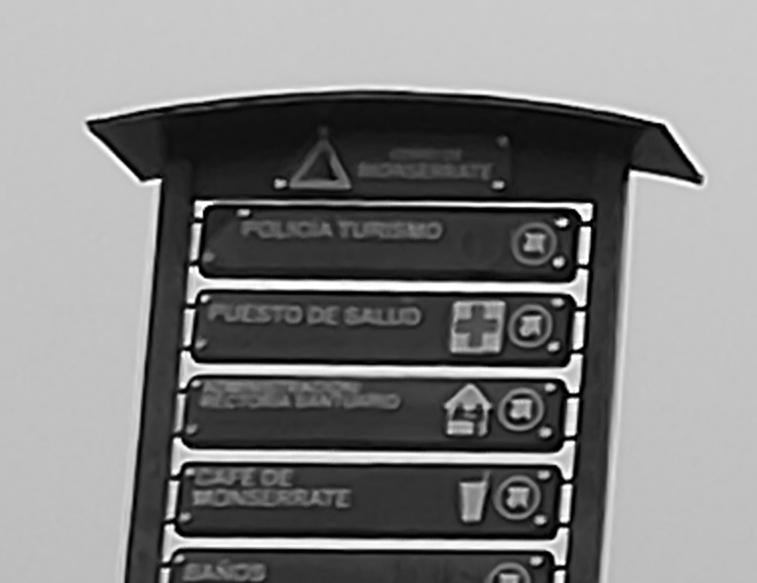

In [22]:
original_gray

array([[199, 199, 199, ..., 204, 204, 204],
       [199, 199, 199, ..., 204, 204, 204],
       [199, 199, 199, ..., 204, 204, 204],
       ...,
       [187, 187, 187, ..., 190, 191, 191],
       [187, 187, 187, ..., 190, 190, 191],
       [187, 187, 187, ..., 190, 190, 190]], dtype=uint8)
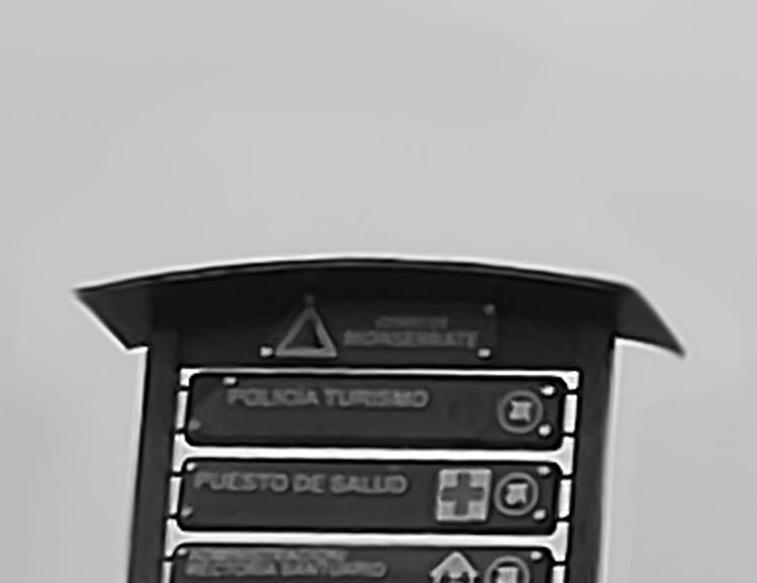

In [23]:
tampered_gray

In [26]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.5593768964562187


Diff farklılık haritasıdır


In [27]:
thresh = cv2.threshold(diff, 0, 255,
                       cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

Farklılık olan bölgeleri beyaza çevirdik


In [28]:
cnts, _ = cv2.findContours(thresh.copy(),
                           cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)

In [35]:
output = original.copy()

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(output, (x, y), (x + w, y + h), (40, 0, 255), 2)

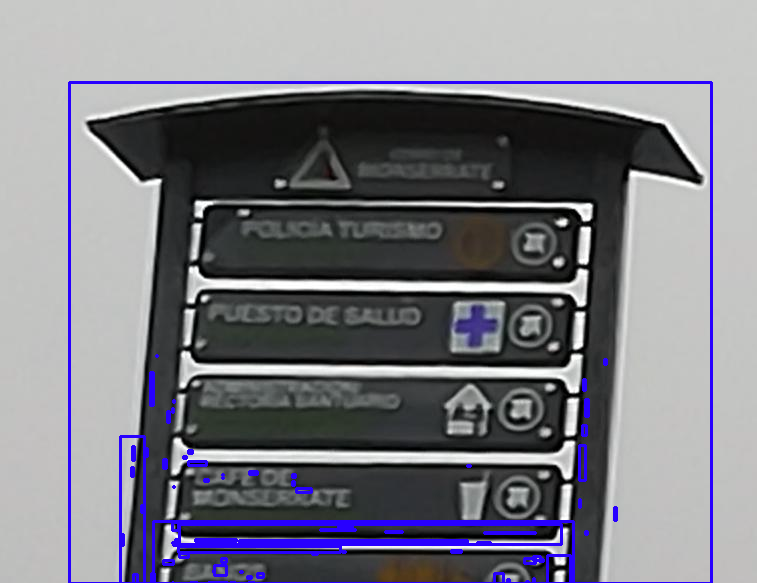

In [36]:
from PIL import Image

Image.fromarray(output)